## 2. Polynomial regression model


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [14]:
data=pd.read_csv('AirPassengers.csv')

In [7]:
poly = PolynomialFeatures(degree=3)

In [15]:
#converting a month to date_time format
data['Month'] = pd.to_datetime(data['Month'])  # Parse dates
data.set_index('Month', inplace=True)

In [16]:
data['TimeIndex']=np.arange(len(data))

In [17]:
# Instead of using the lists 'x' and 'y', access the data directly from the DataFrame:
X = data[['TimeIndex']]  # Use double brackets to select as a DataFrame
y = data['#Passengers']

# Now you can split the data into training and testing sets:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_poly = poly.fit_transform(X)

In [22]:
# Train-test split
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [23]:
# Model training
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [24]:
# Predictions
y_pred_poly = model_poly.predict(X_test_poly)

# Metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [26]:
print(mse_poly)
print(r2_poly)

1616.3833192361226
0.8373416590891156


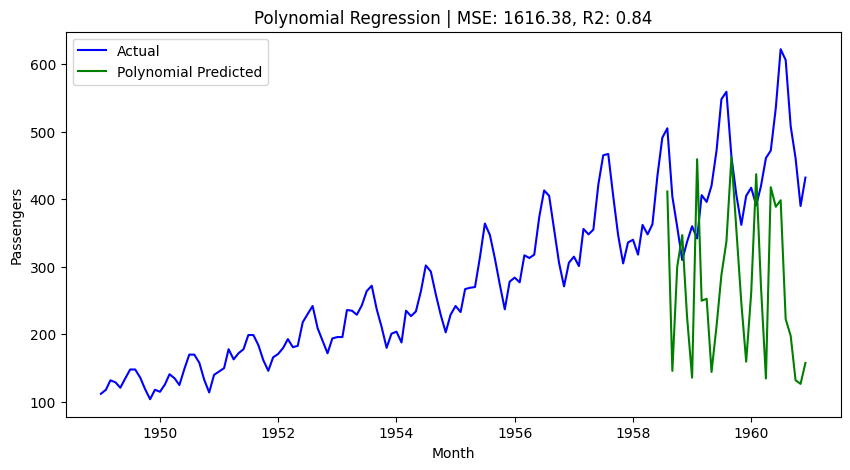

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, y, label='Actual', color='blue')
plt.plot(data.index[-len(y_test):], y_pred_poly, label='Polynomial Predicted', color='green')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title(f'Polynomial Regression | MSE: {mse_poly:.2f}, R2: {r2_poly:.2f}')
plt.show()